# Value at Risk Assessment Model 

In [1]:
#import Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Distributinos - Set up Stock Parameters


In [12]:
# Number of shares 
shares_MSFT = 1000

#live stock price 
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]
print('MSFT')
print('----')
print(price.history().tail(1)['Close'].iloc[0])


MSFT
----
302.1700134277344


In [15]:
# Investment Value 
value_MSFT = price_MSFT * shares_MSFT

# risk free rate ( 4 week treasury bill rate)
rfr_MSFT = 0.02

#volatility (30 day volatility at that time)
vol_MSFT = 0.2216


# Simulations - Calculate Investment Returns

In [64]:
# number of simulations
simulations = 5000

#investment time in a year
t_MSFT = 21/252

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   2.,   0.,   2.,
          5.,   2.,   1.,   4.,   6.,   3.,   3.,   9.,   7.,   6.,   9.,
          8.,   8.,  16.,  24.,  21.,  24.,  33.,  41.,  37.,  45.,  51.,
         57.,  64.,  71.,  74.,  73.,  97.,  84.,  99.,  95., 109., 115.,
        116., 121., 132., 133., 150., 140., 145., 159., 146., 123., 144.,
        125., 144., 144., 133., 131., 134., 127., 114., 104.,  86.,  99.,
        105.,  76.,  69.,  72.,  76.,  73.,  39.,  43.,  46.,  35.,  33.,
         17.,  24.,  23.,  15.,  17.,  15.,  13.,   7.,  10.,   9.,   5.,
          3.,   5.,   1.,   2.,   2.,   2.,   0.,   1.,   1.,   0.,   0.,
          2.]),
 array([-3.82150560e+00, -3.74939671e+00, -3.67728783e+00, -3.60517894e+00,
        -3.53307006e+00, -3.46096118e+00, -3.38885229e+00, -3.31674341e+00,
        -3.24463452e+00, -3.17252564e+00, -3.10041676e+00, -3.02830787e+00,
        -2.95619899e+00, -2.88409010e+00, -2.81198122e+00, -2.73987233e+00,
        -2.667

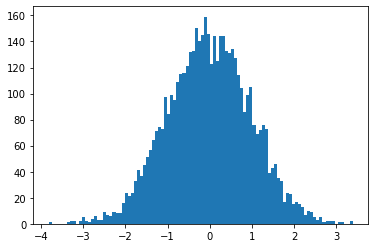

In [65]:
# explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample, bins=100)

In [66]:
print(np.mean(sample))
print(np.std(sample))

-0.020250129962752203
0.9831580397732071


In [67]:
# create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - 0.5 * vol **2)* t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value- - pv
    return returns
# apply the Var function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

# Quantifcations - ientify VaR at 90%, 95% and 99% Confidence Level

In [68]:
# Explain string formatting
#print: Var at x% confidence level:$y:
x = 0.9 
y = 3455.248
print("VaR at {:.0%} confidenece level: ${:,.0f}".format(x, y))

VaR at 90% confidenece level: $3,455


VaR at 90% confidence level: $580,487
VaR at 95% confidence level: $574,108
VaR at 99% confidence level: $562,410


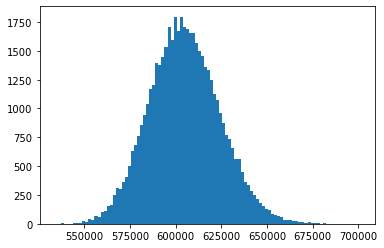

In [63]:
#plot the returns
plt.hist(returns_MSFT, bins = 100); 
#Show Var at 90% 95% confidence levels
percentiles = [10,5,1]

for i in percentiles:
    confidence = (1-i/100)
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
